In [97]:
# Load EDA Pkgs
import pandas as pd 
import numpy as np
# Load Data Vis Pkg
import matplotlib.pyplot as plt 
import seaborn as sns

In [133]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [134]:
# For Neural network (MultiLayerPerceptron)
from sklearn.neural_network import MLPClassifier

In [135]:
col_names = ['buying','maint','doors' ,'persons','lug_boot','safety','class']

In [136]:
# Load dataset
df = pd.read_csv("car.data",names=col_names)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [137]:
df1.isnull().sum().any()

False

In [138]:
df["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

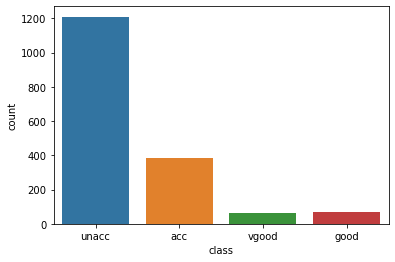

In [139]:
sns.countplot(x= "class",data=df)

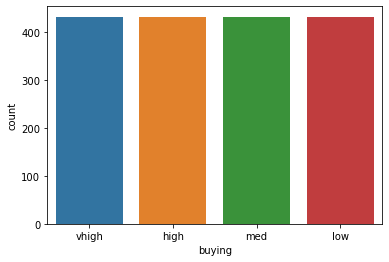

In [140]:
sns.countplot(x=df["buying"])

In [141]:
df["maint"].value_counts()

vhigh    432
med      432
low      432
high     432
Name: maint, dtype: int64

In [142]:
df["doors"].value_counts()

3        432
5more    432
2        432
4        432
Name: doors, dtype: int64

In [143]:
df["persons"].value_counts()

more    576
2       576
4       576
Name: persons, dtype: int64

In [144]:
df["lug_boot"].value_counts()

med      576
small    576
big      576
Name: lug_boot, dtype: int64

In [145]:
df["safety"].value_counts()

med     576
low     576
high    576
Name: safety, dtype: int64

In [146]:
# Custom Function
buying_label = { ni: n for n,ni in enumerate(set(df['buying']))}
maint_label = { ni: n for n,ni in enumerate(set(df['maint']))}
doors_label = { ni: n for n,ni in enumerate(set(df['doors']))}
persons_label = { ni: n for n,ni in enumerate(set(df['persons']))}
lug_boot_label = { ni: n for n,ni in enumerate(set(df['lug_boot']))}
safety_label = { ni: n for n,ni in enumerate(set(df['safety']))}
class_label = { ni: n for n,ni in enumerate(set(df['class']))}
df1 = df

In [155]:
print("buying",format(buying_label))
print("maint",format(maint_label))
print("doors",format(doors_label))
print("persons",format(persons_label))
print("lug_boot",format(lug_boot_label))
print("safety",format(safety_label))
print("class",format(class_label))

buying {'vhigh': 0, 'high': 1, 'low': 2, 'med': 3}
maint {'vhigh': 0, 'high': 1, 'low': 2, 'med': 3}
doors {'5more': 0, '4': 1, '3': 2, '2': 3}
persons {'more': 0, '4': 1, '2': 2}
lug_boot {'small': 0, 'big': 1, 'med': 2}
safety {'med': 0, 'high': 1, 'low': 2}
class {'acc': 0, 'unacc': 1, 'vgood': 2, 'good': 3}


In [147]:
df1['buying'] = df1['buying'].map(buying_label)
df1['maint'] = df1['maint'].map(maint_label)
df1['doors'] = df1['doors'].map(doors_label)
df1['persons'] = df1['persons'].map(persons_label)
df1['lug_boot'] = df1['lug_boot'].map(lug_boot_label)
df1['safety'] = df1['safety'].map(safety_label)
df1['class'] = df1['class'].map(class_label)

In [148]:
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,3,2,0,2,1
1,0,0,3,2,0,0,1
2,0,0,3,2,0,1,1
3,0,0,3,2,2,2,1
4,0,0,3,2,2,0,1


In [150]:
#method second
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df2 = df

In [123]:
for i in df2.columns:
    df2[i]=lb.fit_transform(df2[i])


In [124]:
df2.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,3,2,0,2,1
1,0,0,3,2,0,0,1
2,0,0,3,2,0,1,1
3,0,0,3,2,2,2,1
4,0,0,3,2,2,0,1


In [159]:
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [173]:
from sklearn.model_selection import cross_val_score ,ShuffleSplit , train_test_split
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [172]:
logreg = cross_val_score(LogisticRegression(solver="liblinear"),x,y,cv=cv)
np.mean(logreg)

0.7462427745664739

In [175]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [179]:
# Using - Logisitic Regression
logreg = LogisticRegression(solver="liblinear")
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [180]:
from sklearn.metrics import confusion_matrix , accuracy_score
print("Accuracy Score :", accuracy_score(y_test,y_pred))

Accuracy Score : 0.7514450867052023


In [190]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(x_train,y_train)
y_pred = randomforest.predict(x_test)

In [191]:
print("Accuracy Score :", accuracy_score(y_test,y_pred))

Accuracy Score : 0.9653179190751445


In [204]:
mlp = MLPClassifier(hidden_layer_sizes=(500,),activation="relu",solver='lbfgs',random_state=0)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)

In [205]:
print("Accuracy score :",accuracy_score(y_test,y_pred))

Accuracy score : 0.9826589595375722


In [210]:
import joblib

In [212]:
logit_model = open("logit_car_model.pkl","wb")
joblib.dump(logreg,logit_model)
logit_model.close()

In [213]:
random_model = open("random_forest_car_model.pkl","wb")
joblib.dump(randomforest,random_model)
random_model.close()

In [214]:
mlp_model = open("mlp_car_model.pkl","wb")
joblib.dump(mlp,mlp_model)
mlp_model.close()